## Project Title : Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on features including weather, day, time, humidity, wind speed, season e.t.c.

## Steps Performed

* Data exploration and visualization
* Implementing linear regression using sklearn and optimization
* Applying regularization using lasso and ridge techniques
* Calculating and comparing the MSE value of each regression technique
* Analyze the feature importances

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of each 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

In [3]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip -qq Bike_Sharing_Dataset.zip

#### Importing Necessary Packages

In [1]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [4]:
# Reading Our Dataset
bikeshare = pd.read_csv('hour.csv')

In [ ]:
bikeshare.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bikeshare.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Task flow with respect to feature processing and model training

* Identify continuous features

* Identify categorical features

* Apply scaling on continuous features

* Apply one-hot encoding on categorical features

* Create features by concatenating all one hot encoded features and scaled features except target variables

* Apply linear regression using sklearn by taking one (cnt) and two target variables (casual, registered)

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization

#### Visualizing the hour (hr) column with a bar plot and finding the busy hours of bike sharing

<Axes: xlabel='hr'>

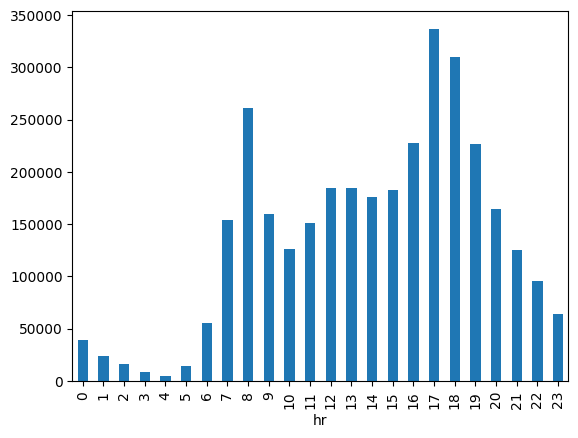

In [5]:
bikeshare.groupby('hr').sum('cnt')['cnt'].plot.bar()

We see the number of bikes are highest at 8 am in the morning which could suggest office rush at that time. During the evening, 5-6 pm are the most busy hours when people might return from work.

#### Visualizing the distribution of count, casual and registered variables

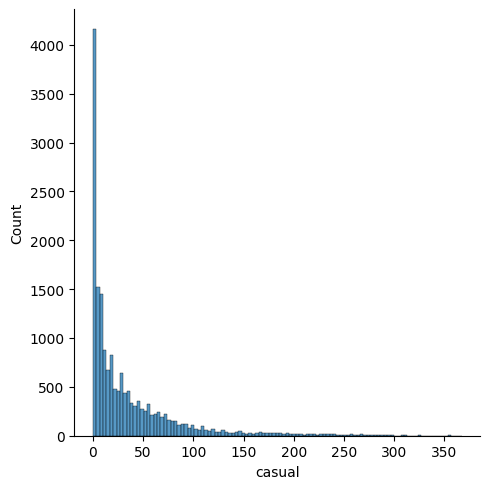

In [6]:
# distribution of casual
sns.displot(bikeshare.casual);

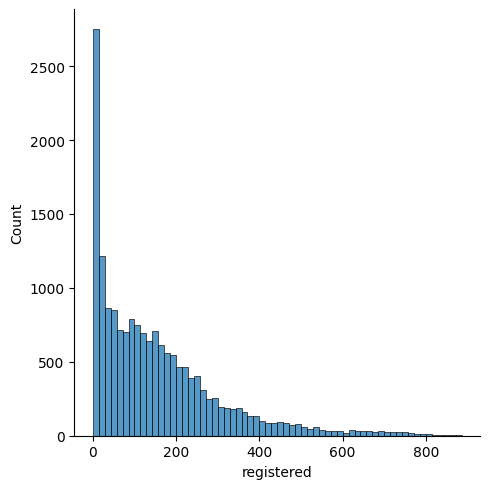

In [ ]:
# distribution of registered
sns.displot(bikeshare.registered);

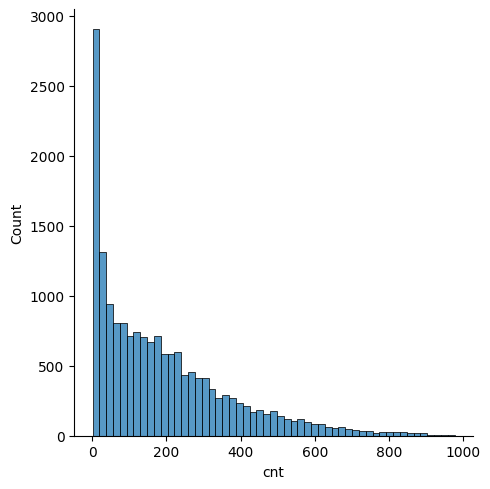

In [7]:
# distribution of count
sns.displot(bikeshare.cnt);

#### Describe the relation of weekday, holiday and working day

In [8]:
# Working days from 1-5 (mon-fri)
bikeshare[bikeshare.workingday==1].weekday.unique()

array([1, 2, 3, 4, 5])

In [9]:
# Holiday possible on working days
bikeshare[bikeshare.holiday==1].weekday.unique()

array([1, 5, 4, 3, 2])

In [10]:
# Not a holiday, not a working day (Sun, Sat)
bikeshare[(bikeshare.holiday==0) & (bikeshare.workingday==0)].weekday.unique()

array([6, 0])

#### Visualizing the monthly wise count of both casual and registered for the year 2011 and 2012 separately.



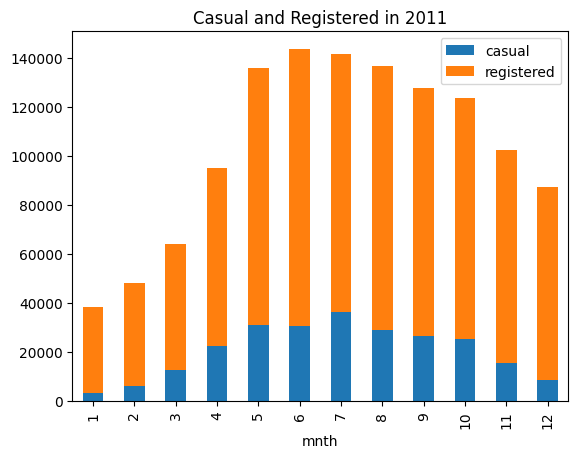

In [ ]:
# stacked bar chart for year 2011
bikeshare[bikeshare.yr==0].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True);
plt.title("Casual and Registered in 2011")
plt.show()

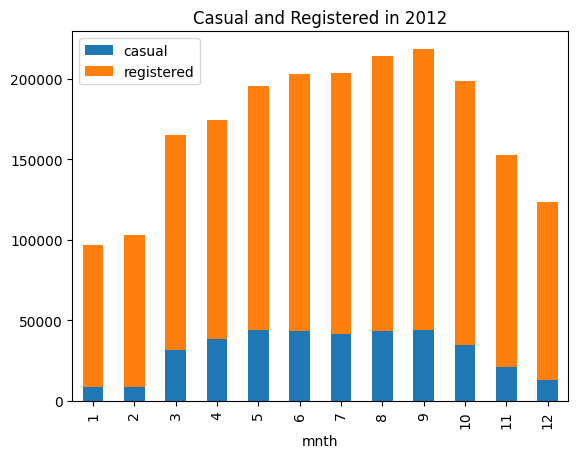

In [ ]:
# stacked bar chart for year 2012
bikeshare[bikeshare.yr==1].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True)
plt.title("Casual and Registered in 2012")
plt.show()

#### Analyzing the correlation between features with heatmap

<Axes: >

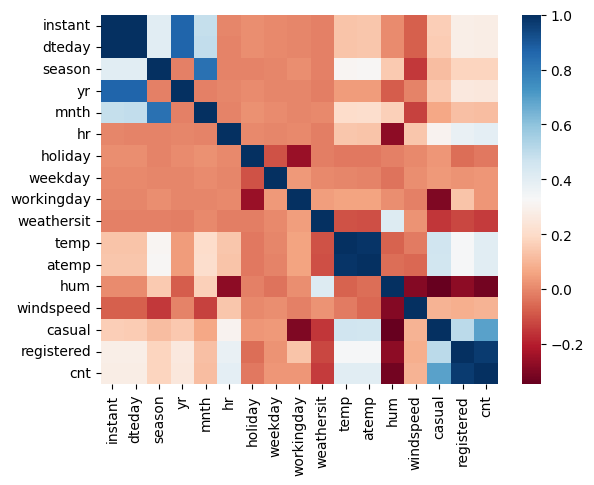

In [ ]:
sns.heatmap(bikeshare.iloc[:,:].corr(), cmap='RdBu')

Closer the value is to 1, the more positively related 2 variables are. For instance, 'mnth' and 'season' are highly correlated as the score is somewhere around 0.8.

Closer the value is to -1, the more negatively related 2 variables are. For instance, 'hum' and 'hr' are negatively correlated as the score is lesser than -0.2.

Closer the value is to 0, the more unrelated 2 variables are. For instance, 'temp' and 'yr' are not correlated as the score is around 0.


In [11]:
# Convert the 'dteday' column to datetime objects
bikeshare['dteday'] = pd.to_datetime(bikeshare['dteday'])
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


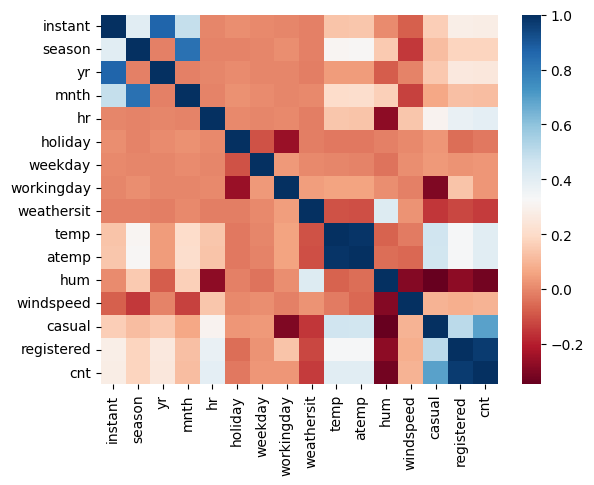

In [12]:
# Extract numerical features for correlation analysis
numerical_features = bikeshare.select_dtypes(include=['number'])

# Calculate the correlation matrix
sns.heatmap(numerical_features.corr(), cmap='RdBu')
plt.show()

#### Visualizing the box plot of casual and registered variables to check the outliers

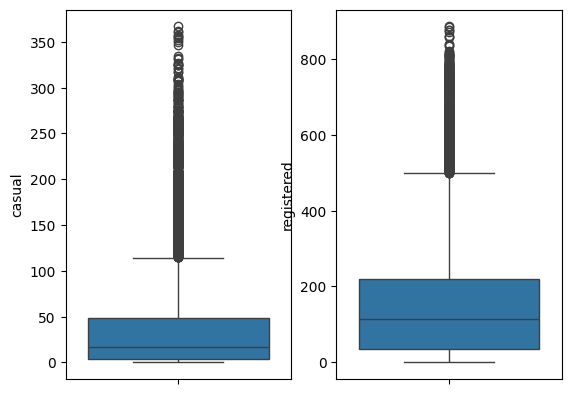

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(data=bikeshare,y="casual",orient="v",ax=axes[0])
sns.boxplot(data=bikeshare,y="registered",orient="v",ax=axes[1])
plt.show()

In the box-plots we do see multiple points beyond the whiskers. However since these are large in number and consistently present, we do not remove these points as we don't want to lose so much data.

### Pre-processing and Data Engineering

#### Dropping unwanted columns

In [13]:
bikeshare1 = bikeshare.drop(['instant', 'dteday'], axis = 1)
bikeshare1.shape

(17379, 15)

#### Identifying categorical and continuous variables


In [14]:
# Identifying categorical and continuous variables
cont_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

#### Feature scaling

Feature scaling is being used to normalize the range of all continuous features such that all features contribute somewhat proportionately to the final distance.

In [15]:
std_scaler = StandardScaler()
scaled_data = pd.DataFrame(std_scaler.fit_transform(bikeshare1[cont_features]), columns = cont_features)
scaled_data.shape

(17379, 4)

In [16]:
scaled_data.head(2)

,temp,atemp,hum,windspeed
0,-1.334648,-1.093281,0.947372,-1.553889
1,-1.438516,-1.181732,0.895539,-1.553889


In [17]:
# scaled features + categorical in one dataframe
scaled_data
for i in categorical_features:
    scaled_data[i] = bikeshare1[i].values
scaled_data.head(2)

,temp,atemp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,weathersit
0,-1.334648,-1.093281,0.947372,-1.553889,1,0,1,0,0,6,1
1,-1.438516,-1.181732,0.895539,-1.553889,1,0,1,1,0,6,1


#### Applying one-hot encode on the categorical data


In [18]:
onehot = OneHotEncoder()
onehot_encoded = onehot.fit_transform(scaled_data[categorical_features]).toarray()
onehot_encoded.shape

(17379, 55)

In [19]:
onehot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
cat_features = onehot.get_feature_names_out().tolist()

In [21]:
feature_names = cont_features + cat_features
feature_names

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'yr_0',
 'yr_1',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'holiday_0',
 'holiday_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

#### Specifying features and targets after applying scaling and one-hot encoding

In [22]:
features = np.concatenate((scaled_data[['temp','atemp','hum','windspeed']].values, onehot_encoded), axis=1)
features.shape

(17379, 59)

In [23]:
features

array([[-1.33464759, -1.0932806 ,  0.9473725 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.4385164 , -1.18173227,  0.89553869, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4385164 , -1.18173227,  0.89553869, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23077877, -1.18173227, -0.34847267, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23077877, -1.18173227,  0.11803159, ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
target = bikeshare1[['casual','registered','cnt']]
target.shape

(17379, 3)

#### Select the features and target and split the dataset

As there are 3 target variables, we choose the count (`cnt`) variable.

In [25]:
target1 = bikeshare1[['cnt']]

In [26]:
target1.head(2)

,cnt
0,16
1,40


In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target1)
x_train.shape, y_train.shape

((13034, 59), (13034, 1))

### Linear regression using sklearn

Implementing the linear regression model using sklearn with two variables in target (casual, registered)


#### Selecting the features  and split the data into train and test

In [42]:
target2 = bikeshare1[['casual', 'registered']]

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target1)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 1))

In [48]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)

#### Calculating the mean squared error of the actual and predicted data

In [49]:
mse_linear = mean_squared_error(ytest, predicted)
mse_linear

10503.242654790422

#### Calculating the $R^2$ (coefficient of determination) of the actual and predicted data

In [50]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.688763458558804, 0.6778389966193044)

### Regularization methods

#### Applying lasso regression

* Applying Lasso regression with different alpha values given below and finding the best alpha that gives the least error.
* Calculating the metrics for the actual and predicted


In [51]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [52]:
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(xtrain, ytrain)
    mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest))
    print(a, "=====",mse_lasso_sk)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+06, tolerance: 4.301e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ===== 10503.231034188519
0.001 ===== 10503.102618748535
0.01 ===== 10502.0569227301
0.1 ===== 10503.339616574758
1 ===== 11167.21386823691
10 ===== 23282.326313034708
100 ===== 32610.191067530384


In [53]:
# with best alpha chosen from above
regr_lasso = linear_model.Lasso(alpha = 0.01)
regr_lasso.fit(xtrain, ytrain)
mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest), multioutput = 'uniform_average')
print("Lasso MSE:",mse_lasso_sk)
print("Lasso r2_score",r2_score(ytrain, regr_lasso.predict(xtrain)))

Lasso MSE: 10502.0569227301
Lasso r2_score 0.6887496455335591


#### Applying ridge regression

* Applying Lasso regression with different alpha values given and finding the best alpha that gives the least error.
* Calculating the metrics for the actual and predicted

In [54]:
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(xtrain, ytrain)
    mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest))
    print(a, "=====",mse_ridge_sk)

0.0001 ===== 10503.242505783342
0.001 ===== 10503.241164785177
0.01 ===== 10503.227761292152
0.1 ===== 10503.094373389516
1 ===== 10501.823672841327
10 ===== 10494.789116601682
100 ===== 10775.922330733005


In [56]:
# with best alpha chosen from above
regr_ridge = linear_model.Ridge(alpha = 10)
regr_ridge.fit(xtrain, ytrain)
mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest))
print("Ridge MSE:",mse_ridge_sk)
print("Ridge r2_score:",r2_score(ytrain, regr_ridge.predict(xtrain)))

Ridge MSE: 10494.789116601682
Ridge r2_score: 0.6885735597980494


#### Applying elasticnet regression

* Applying elasticnet regression with different alpha values given and finding the best alpha that gives the least error.
* Calculating the metrics for the actual and predicted

In [57]:
for a in alpha:
    elasticnet_regr = linear_model.ElasticNet(alpha=a)
    elasticnet_regr.fit(xtrain, ytrain)
    mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest))
    print(a,"====",mse_elatic_sk)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.470e+07, tolerance: 4.301e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ==== 10502.313096786731


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+05, tolerance: 4.301e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ==== 10496.297694714449
0.01 ==== 10615.048374107726
0.1 ==== 14185.805917782112
1 ==== 21718.130949762348
10 ==== 28831.08570996614
100 ==== 32462.90757159359


In [58]:
# Elasticnet
elasticnet_regr = linear_model.ElasticNet(alpha=0.001)
elasticnet_regr.fit(xtrain, ytrain)
mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
print("Elasticnet MSE:",mse_elatic_sk)
print("Elasticnet r2_score",r2_score(ytrain, elasticnet_regr.predict(xtrain)))

Elasticnet MSE: 10496.297694714449
Elasticnet r2_score 0.6886778726002246


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+05, tolerance: 4.301e+04
  model = cd_fast.enet_coordinate_descent(


There is not a lot of difference between the 3 regularization methods in this case. Lowest MSE is obtained by Ridge Regression with r2 as 0.688 for all 3 methods.  

#### Linear regression with 2 variables

In [59]:
target2 = bikeshare1[['casual','registered']]

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target2)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 2))

In [61]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)
predicted.shape

(4345, 2)

In [62]:
predicted

array([[ 35.11205628, 177.81292644],
       [106.18572843, 163.8533375 ],
       [ 56.83193812, 141.08538918],
       ...,
       [ 93.56441577, 119.75694008],
       [ 64.13477834, 425.23380118],
       [ 15.74514968, 216.16045314]])

In [63]:
mse_linear = mean_squared_error(ytest, predicted, multioutput = 'uniform_average')
mse_linear

4100.5822841270665

In [64]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.636217745245757, 0.6340721100243983)